In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


In [35]:
data = pd.read_csv(r'H:\DATA\MY\practice\Practice-36\diamonds_train.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [36]:
print(data.shape)
print(data.info())

(40455, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB
None


In [37]:
print(data.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


C:\Users\mouncef\AppData\Local\Temp\ipykernel_9432\2003706682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

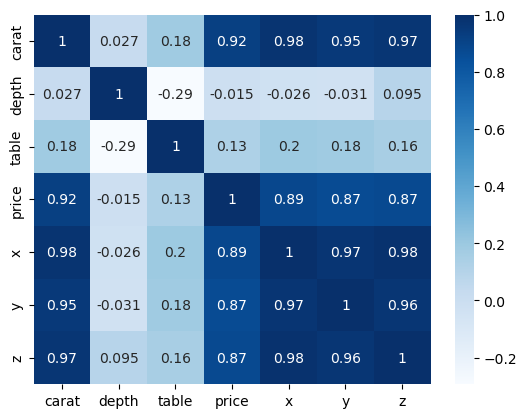

In [38]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot= True, cmap= 'Blues')

In [39]:
for column in data.columns:
  if data[column].dtype == object:
    print(column)
    print(Counter(data[column]))

cut
Counter({'Ideal': 16220, 'Premium': 10260, 'Very Good': 9095, 'Good': 3663, 'Fair': 1217})
color
Counter({'G': 8455, 'E': 7325, 'F': 7177, 'H': 6277, 'D': 5049, 'I': 4032, 'J': 2140})
clarity
Counter({'SI1': 9749, 'VS2': 9248, 'SI2': 6929, 'VS1': 6066, 'VVS2': 3799, 'VVS1': 2774, 'IF': 1327, 'I1': 563})


In [40]:
print(data.shape)
for column in data.columns:
  if data[column].dtype != object:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
print(data.shape)

(40455, 10)
(34900, 10)


In [41]:
# we need to encode the categorical data , hence we are using target encoding

import pandas as pd
from category_encoders import TargetEncoder

X = data.drop('price', axis = 1)
Y = data['price']

encoder = TargetEncoder(smoothing=5)
X_encoded = encoder.fit_transform(X, Y)

cod_data = pd.DataFrame(X_encoded)
cod_data['price'] = Y
cod_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,3326.996788,3824.550535,2978.029288,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,3127.991095,3346.583175,2978.029288,63.0,57.0,4.35,4.38,2.75,505
3,0.41,3125.221622,2536.895039,3118.863944,63.8,56.0,4.68,4.72,3.00,738
4,1.02,2679.581074,3096.007573,3118.863944,60.5,59.0,6.55,6.51,3.95,4882
5,1.52,2679.581074,2905.906035,3705.316022,61.2,57.0,7.45,7.39,4.54,9057


<Axes: >

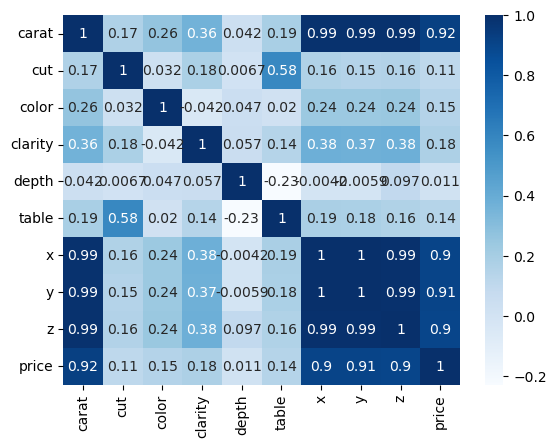

In [42]:
corr_matrix = cod_data.corr()

sns.heatmap(corr_matrix, annot= True, cmap= 'Blues')

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = LinearRegression()

X = cod_data.drop('price', axis = 1)
Y = cod_data['price']

X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

r2_train = r2_score(y_pred_train, y_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'training r2 score : {r2_train * 100:.2f}%')
print(f'testing r2 score : {r2 * 100:.2f}%')
print(mse)

training r2 score : 89.36%
testing r2 score : 90.71%
652422.5026106717


In [44]:
cv_score = cross_val_score(model, X, Y, scoring='r2')

print('the cross validation score : ', cv_score)

the cross validation score :  [0.90436777 0.90492644 0.90219698 0.90375138 0.90652604]


In [45]:
models = [Lasso(), LinearRegression(), Ridge(), KNeighborsRegressor(),XGBRegressor()]

for model in models:
  model.fit(x_train, y_train)
  
  y_pred_train = model.predict(x_train)
  y_pred = model.predict(x_test)
  
  r2_train = r2_score(y_train, y_pred_train)
  r2  = r2_score(y_test, y_pred)
  
  print(f'This is the results for the {model} model ...')
  print(f'The Training R2 score : {r2_train*100:.2f}%')
  print(f'The testing R2 score : {r2*100:.2f}%')
  print('...')

c:\Users\mouncef\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.957e+07, tolerance: 1.853e+07
  model = cd_fast.enet_coordinate_descent(


This is the results for the Lasso() model ...
The Training R2 score : 90.35%
The testing R2 score : 90.67%
...
This is the results for the LinearRegression() model ...
The Training R2 score : 90.38%
The testing R2 score : 90.71%
...
This is the results for the Ridge() model ...
The Training R2 score : 90.38%
The testing R2 score : 90.71%
...
This is the results for the KNeighborsRegressor() model ...
The Training R2 score : 97.24%
The testing R2 score : 95.71%
...
This is the results for the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_ste

In [46]:
cv_score = cross_val_score(XGBRegressor(), X_scaled, Y, scoring= 'r2')

print('the cross validation score : ', cv_score)
print('the mean cross validation score : ', cv_score.mean())

the cross validation score :  [0.98186749 0.98194313 0.98252618 0.98112798 0.98170781]
the mean cross validation score :  0.9818345189094544


In [47]:
# one last test we need to perform is the VAF test , to check how good is our model in explaining the variance of our data
model = XGBRegressor()

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)

residual_variance = np.var(y_train - y_pred_train)

# Variance of the actual data
actual_variance = np.var(y_train)

# Calculate VAF
vaf = (1 - residual_variance / actual_variance) * 100

print(f'Variance Accounted For (VAF): {vaf:.2f}%')

Variance Accounted For (VAF): 99.12%


In [48]:
test_data = pd.read_csv(r'H:\DATA\MY\practice\Practice-36\diamonds_test.csv')

data = test_data.drop('id',axis= 1)

enco_test_data = encoder.transform(data)

X_scaled = scaler.fit_transform(enco_test_data)

y_pred_test = model.predict(X_scaled)

submission = pd.DataFrame({
    'id': test_data['id'],
    'predicted': y_pred_test
})

submission.head(20)

,id,predicted
0,0,3039.750977
1,1,5218.430664
2,2,9028.789062
3,3,3882.816650
4,4,1283.895752
5,5,5593.520996
6,6,4078.011963
7,7,3549.210693
8,8,5009.615234
9,9,11165.453125


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
[1611.0468 1217.4261 3578.8105 ... 7068.292  1815.6779 4942.4004]
0.9824042320251465
123587.5040597239


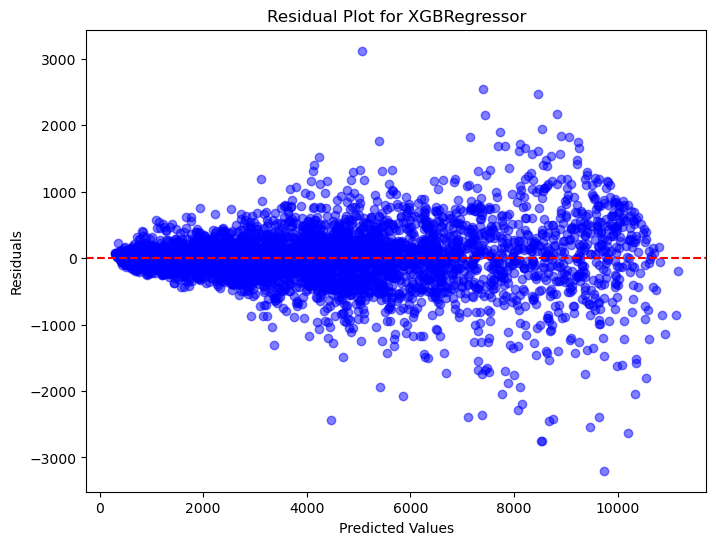

RandomForestRegressor()
[1654.   1221.23 3548.72 ... 7202.57 1908.2  4905.31]
0.981869369822181
127344.26866035741


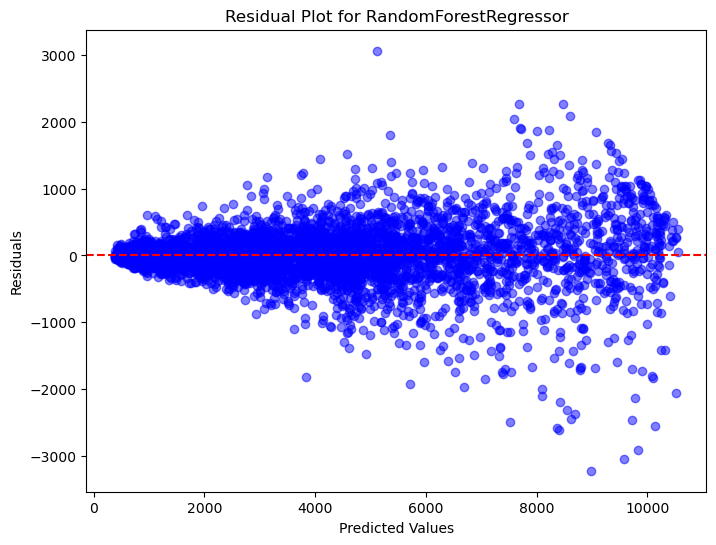

KNeighborsRegressor()
[1606.6 1186.8 4911.4 ... 7987.6 1925.6 4835. ]
0.9570808491473373
301451.62210315187


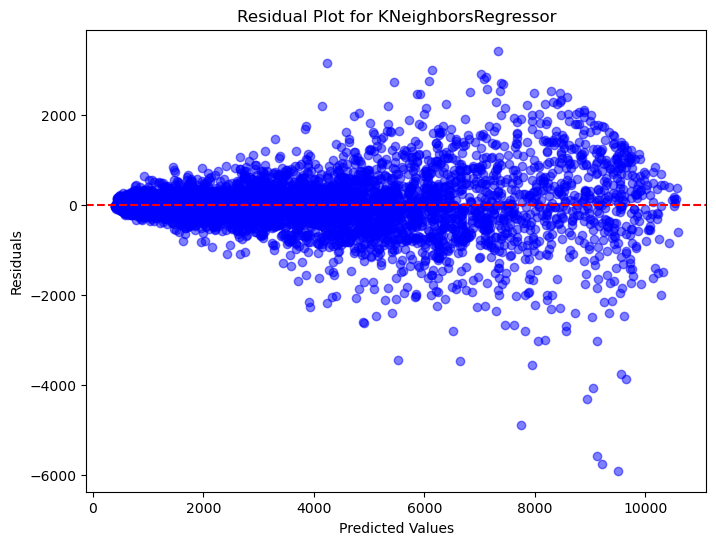

In [49]:
from sklearn.ensemble import RandomForestRegressor

models = [XGBRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    residuals = pd.DataFrame(y_test - y_pred)
    print(model)
    print(y_pred)
    print(r2)
    print(mse)
    # Residual plot for XGBRegressor
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model.__class__.__name__}')
    plt.show()


In [50]:
models = [XGBRegressor(), RandomForestRegressor()]
submission = pd.DataFrame()
submission['id'] = test_data['id']

for model in  models:
  model.fit(x_train, y_train)
  
  y_pred = model.predict(X_scaled)
  submission[model.__class__.__name__] = y_pred
  

In [52]:
submission.head(20)

,id,XGBRegressor,RandomForestRegressor
0,0,3039.750977,2047.79
1,1,5218.430664,4336.12
2,2,9028.789062,6688.27
3,3,3882.816650,2732.59
4,4,1283.895752,1256.48
5,5,5593.520996,3700.49
6,6,4078.011963,3362.04
7,7,3549.210693,3119.33
8,8,5009.615234,4214.34
9,9,11165.453125,9920.02
